In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [50]:
pd.set_option('display.max_columns',100)
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [52]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [53]:
df['no_year']=2020-df['Year']

In [54]:
df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [55]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [56]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [57]:
#outliers detection
out_fut=['Selling_Price','Present_Price','Kms_Driven','no_year']
def detect_outliers(data):
    out=[]
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lwr_bound=q1-(IQR*1.5)
    upper_bound=q3+(IQR*1.5)
    
    for i in data:
        if i<lwr_bound or i>upper_bound:
            out.append(i)
    return out
for i in out_fut:
    print('outliers of ',i,' attribute:',len(detect_outliers(df[i])))

outliers of  Selling_Price  attribute: 17
outliers of  Present_Price  attribute: 14
outliers of  Kms_Driven  attribute: 8
outliers of  no_year  attribute: 7


In [58]:
#replacing the values with mean values
def handle_outliers(data):
    out=[]
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lwr_bound=q1-(IQR*1.5)
    upper_bound=q3+(IQR*1.5)
    
    b=np.where(data<lwr_bound,lwr_bound,data)
    b1=np.where(b>upper_bound,upper_bound,b)
    return b1
for i in out_fut:
    df[i]=handle_outliers(df[i])

<AxesSubplot:>

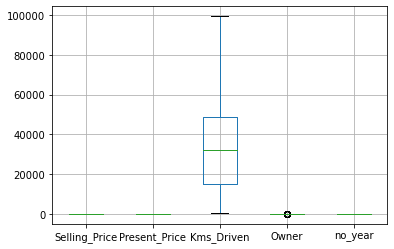

In [59]:
df.boxplot()

In [60]:
df[df.duplicated()]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
17,7.75,10.79,43000.0,Diesel,Dealer,Manual,0,4.0
93,13.65,22.95,40000.0,Diesel,Dealer,Automatic,0,5.0


In [61]:
df.drop_duplicates(inplace=True)

In [62]:
# lb=LabelEncoder()
# df['Fuel_Type']=lb.fit_transform(df['Fuel_Type'])
# df['Seller_Type']=lb.fit_transform(df['Seller_Type'])
# df['Transmission']=lb.fit_transform(df['Transmission'])

In [63]:
df=pd.get_dummies(df,drop_first=True)

In [64]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0,6.0,0,1,0,1
1,4.75,9.54,43000.0,0,7.0,1,0,0,1
2,7.25,9.85,6900.0,0,3.0,0,1,0,1
3,2.85,4.15,5200.0,0,9.0,0,1,0,1
4,4.60,6.87,42450.0,0,6.0,1,0,0,1


<AxesSubplot:>

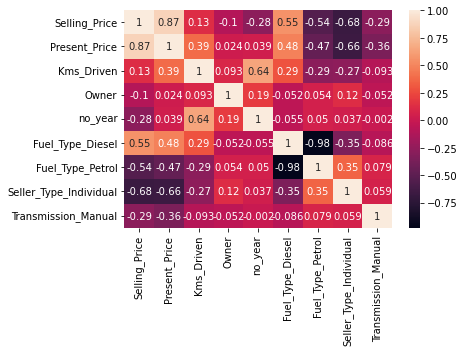

In [65]:
sns.heatmap(df.corr(),annot=True)

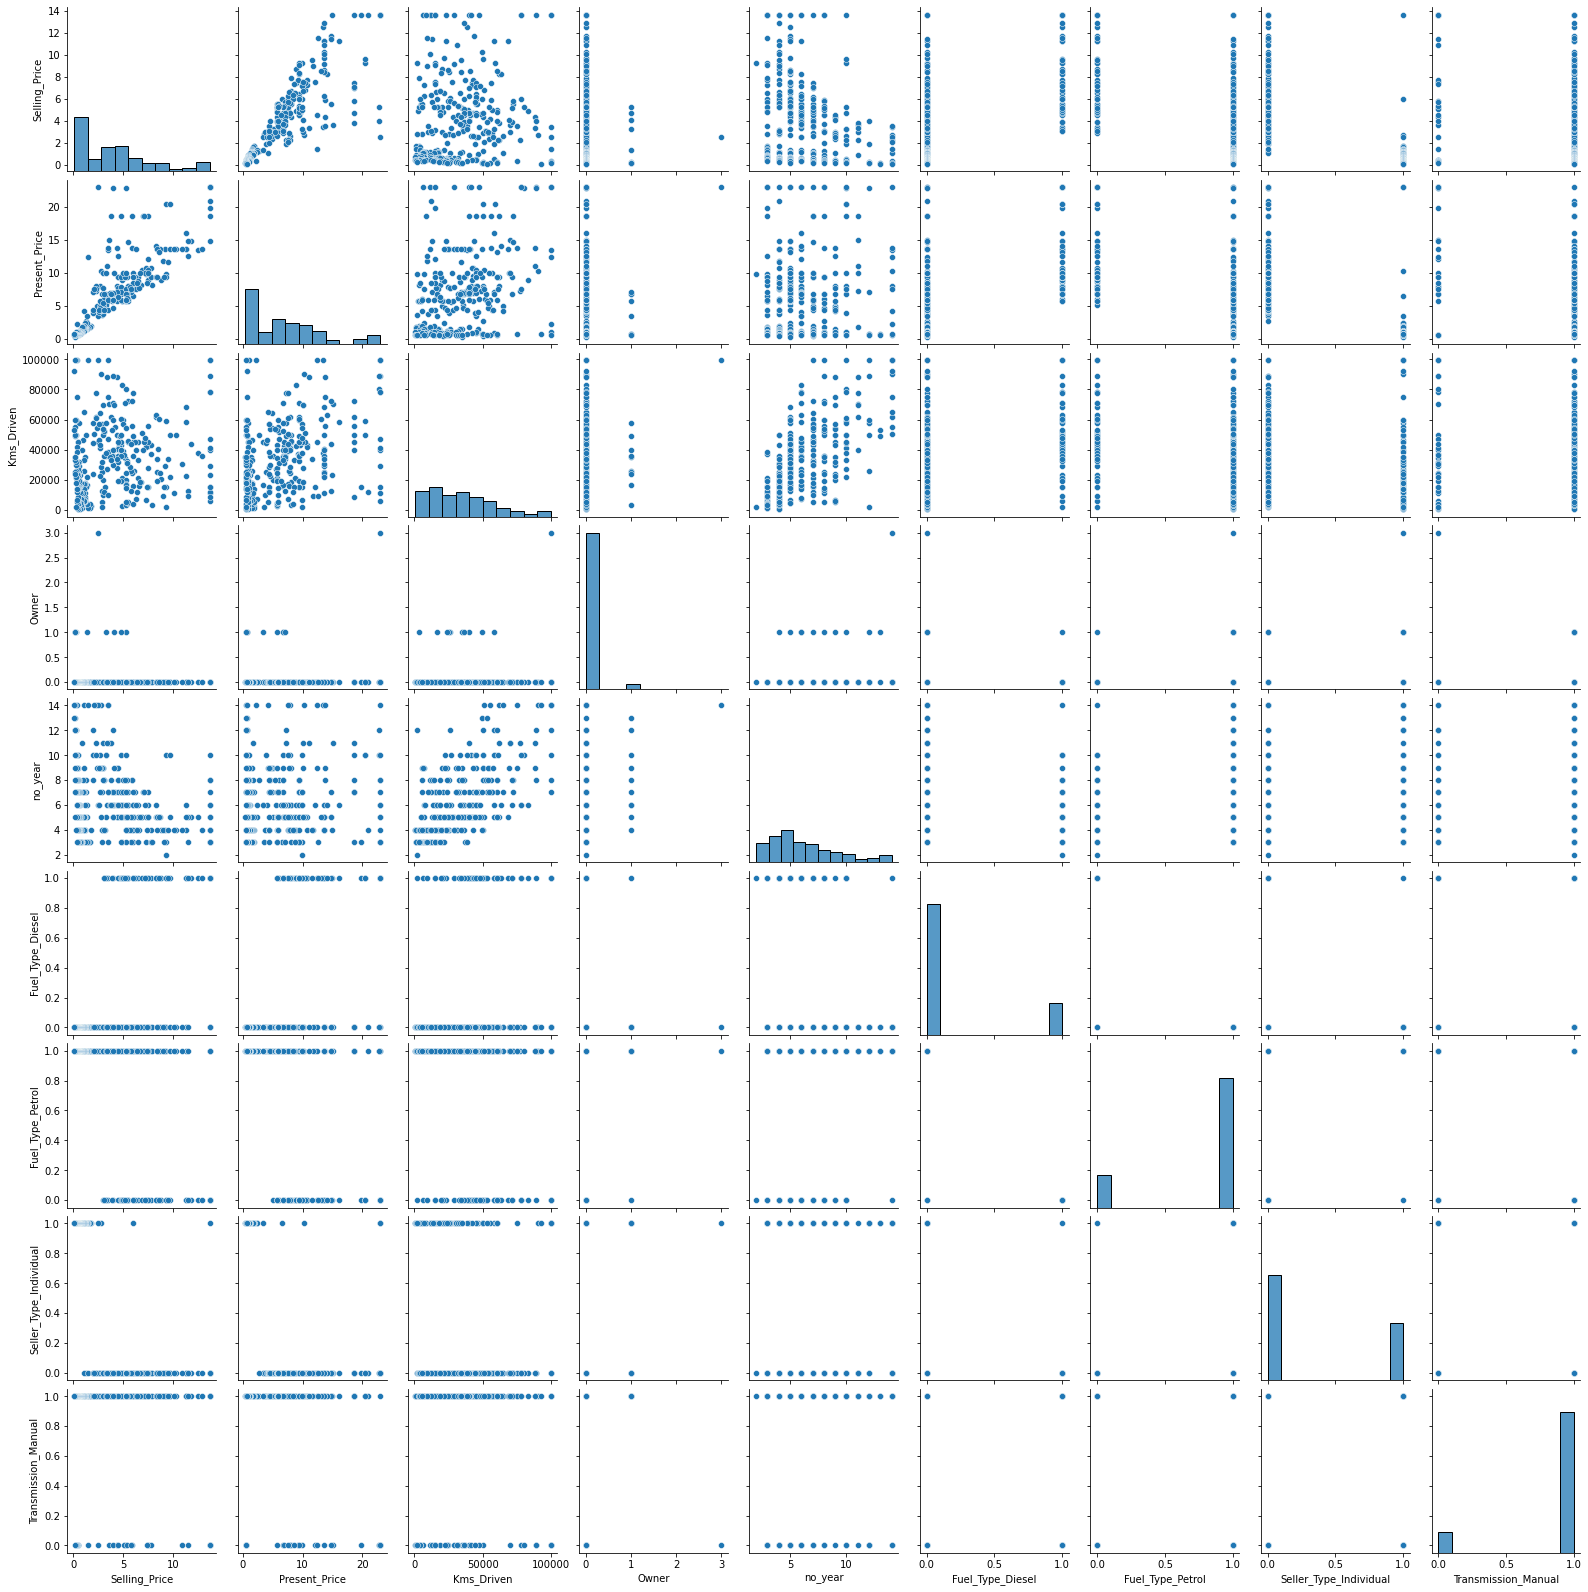

In [66]:
sns.pairplot(df)

In [67]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [68]:
#feature importance/feature selection
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [69]:
model.feature_importances_

array([4.56842405e-01, 2.97818065e-02, 4.02984276e-04, 1.11208855e-01,
       4.78568123e-02, 2.97389189e-02, 3.10262568e-01, 1.39056503e-02])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


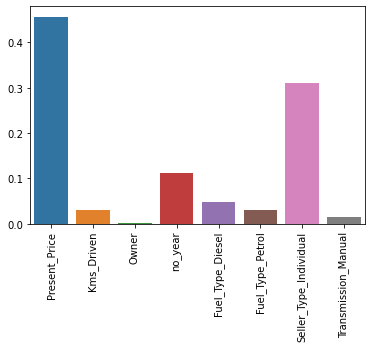

In [70]:
sns.barplot(X.columns,model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [72]:
from sklearn.ensemble import RandomForestRegressor


In [73]:
#number of trees in random forest
n_estimators=[int(i) for i in np.linspace(100,1200,12)]
#number of features to consider at every split
max_features=['auto','sqrt']
#maximum number of levels in tree
max_depth=[int(i) for i in np.linspace(5,30,6)]
#minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#minimum number of samples  required at each leaf node
min_samples_leaf=[1,2,5,10]

# Hyper parameter tuning

In [74]:
#hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV


In [75]:
#create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [76]:
reg=RandomForestRegressor(random_state=15)

In [77]:
reg_random=RandomizedSearchCV(estimator=reg,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)
    

In [78]:
reg_random.fit(X_train,y_train)
# reg=reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=15),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [115]:
reg_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [141]:
reg_random.best_score_

-0.973949958791082

In [79]:
predictions=reg_random.predict(X_test)
predictions

array([ 0.42732, 10.08203, 13.29945,  0.40504,  3.41615,  0.22606,
        8.59494, 12.86055,  2.38034,  2.5855 ,  1.10899,  0.89643,
        7.36609,  3.4984 ,  1.0655 ,  4.221  ,  6.42468,  0.99238,
        8.60704,  1.30273,  0.26972,  7.60105,  6.95429,  3.40739,
        4.04147,  1.24367,  5.3582 ,  0.63537,  0.84301,  5.4014 ,
        9.6985 ,  3.35281,  0.89901,  5.44079,  0.71324, 12.72231,
        2.93985,  0.64602,  8.76783,  0.40435,  4.65985,  0.48647,
        1.0689 ,  6.22724,  6.9303 ,  7.79274,  0.63221,  0.80288,
       12.61391,  0.36792,  2.88071,  3.2963 ,  0.44549,  6.77019,
        0.51843,  5.1723 ,  0.45983,  7.25165,  0.54374,  0.68006])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

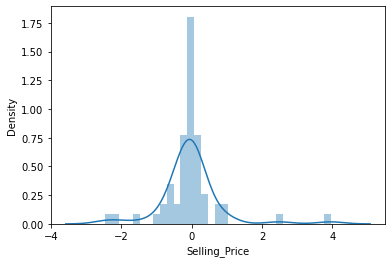

In [80]:
sns.distplot(y_test-predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

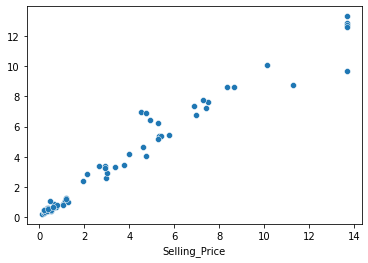

In [81]:
sns.scatterplot(y_test,predictions)

In [82]:
from sklearn import metrics 

In [83]:
round(metrics.r2_score(y_test,predictions)*100,2)

95.61

In [84]:
from sklearn import linear_model
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble 



C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warning

R2 value: 92.54 %
mean absolute error: 0.8859379318695837
MAPE: 1.1223339104673906
mean square error: 1.2135765999640822
RMSE: 1.101624527669969


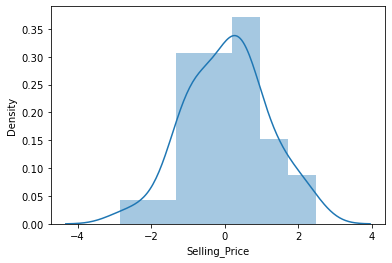

In [85]:
#linear regression
reg= linear_model.LinearRegression(normalize=True)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

mod1_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod1_mae=metrics.mean_absolute_error(y_test,y_pred)
mod1_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod1_mse=metrics.mean_squared_error(y_test,y_pred)
mod1_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod1_r2,'%')
print('mean absolute error:',mod1_mae)
print('MAPE:',mod1_mape)
print('mean square error:',mod1_mse)
print('RMSE:',mod1_rmse)

sns.distplot(y_test-y_pred)
plt.show()

R2 value: 92.55 %
mean absolute error: 0.8869643863806811
MAPE: 1.1220966645969337
mean square error: 1.2118865853766938
RMSE: 1.1008572048075507


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


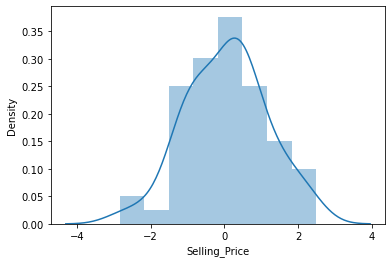

In [86]:
#Ridge regression
reg=linear_model.Ridge(alpha=.5)
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
mod2_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod2_mae=metrics.mean_absolute_error(y_test,y_pred)
mod2_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod2_mse=metrics.mean_squared_error(y_test,y_pred)
mod2_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod2_r2,'%')
print('mean absolute error:',mod2_mae)
print('MAPE:',mod2_mape)
print('mean square error:',mod2_mse)
print('RMSE:',mod2_rmse)
sns.distplot(y_test-y_pred)
plt.show()

R2 value: 92.66 %
mean absolute error: 0.8852822708502812
MAPE: 1.1000985477382157
mean square error: 1.1936112957847758
RMSE: 1.0925251922883865


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


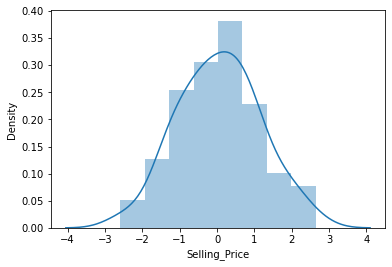

In [87]:
#Lasso regression
reg=linear_model.Lasso(alpha=0.1)
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
                   
mod3_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod3_mae=metrics.mean_absolute_error(y_test,y_pred)
mod3_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod3_mse=metrics.mean_squared_error(y_test,y_pred)
mod3_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod3_r2,'%')
print('mean absolute error:',mod3_mae)
print('MAPE:',mod3_mape)
print('mean square error:',mod3_mse)
print('RMSE:',mod3_rmse)
sns.distplot(y_test-y_pred)
plt.show()

R2 value: 94.92 %
mean absolute error: 0.46300000000000024
MAPE: 0.18762418558501945
mean square error: 0.8272099999999999
RMSE: 0.9095108575492653


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


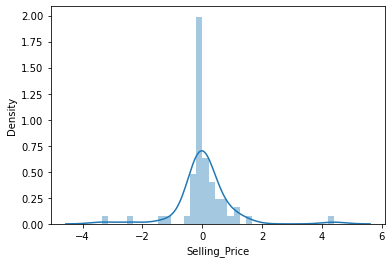

In [145]:
#Decision tree regression
reg=tree.DecisionTreeRegressor()
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

mod4_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod4_mae=metrics.mean_absolute_error(y_test,y_pred)
mod4_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod4_mse=metrics.mean_squared_error(y_test,y_pred)
mod4_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod4_r2,'%')
print('mean absolute error:',mod4_mae)
print('MAPE:',mod4_mape)
print('mean square error:',mod4_mse)
print('RMSE:',mod4_rmse)
sns.distplot(y_test-y_pred)
plt.show()

R2 value: 96.75 %
mean absolute error: 0.4060119029582123
MAPE: 0.20677629393058009
mean square error: 0.5287866440049828
RMSE: 0.7271771751127662


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


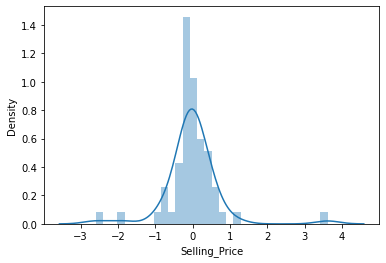

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


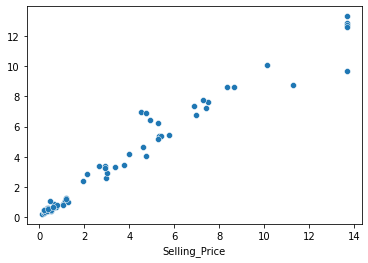

In [153]:
#Gradient boosting regression
reg=ensemble.GradientBoostingRegressor(random_state=1)
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

mod5_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod5_mae=metrics.mean_absolute_error(y_test,y_pred)
mod5_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod5_mse=metrics.mean_squared_error(y_test,y_pred)
mod5_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod5_r2,'%')
print('mean absolute error:',mod5_mae)
print('MAPE:',mod5_mape)
print('mean square error:',mod5_mse)
print('RMSE:',mod5_rmse)
sns.distplot(y_test-y_pred)
plt.show()
sns.scatterplot(y_test,predictions)
plt.show()

R2 value: 96.64 %
mean absolute error: 0.39525666666666637
MAPE: 0.14303937903894373
mean square error: 0.5469340860000009
RMSE: 0.7395499212358831


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


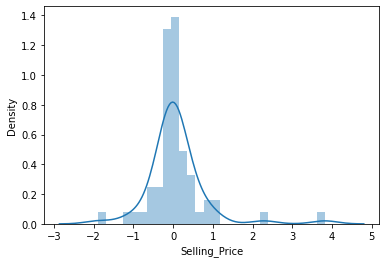

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


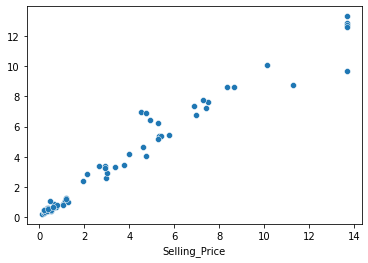

In [148]:
#Random forest regression
reg=ensemble.RandomForestRegressor(random_state=15)
reg=reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

mod6_r2=round(metrics.r2_score(y_test,y_pred)*100,2)
mod6_mae=metrics.mean_absolute_error(y_test,y_pred)
mod6_mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mod6_mse=metrics.mean_squared_error(y_test,y_pred)
mod6_rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('R2 value:',mod6_r2,'%')
print('mean absolute error:',mod6_mae)
print('MAPE:',mod6_mape)
print('mean square error:',mod6_mse)
print('RMSE:',mod6_rmse)
sns.distplot(y_test-y_pred)
plt.show()
sns.scatterplot(y_test,predictions)
plt.show()

# Gradient boosting regression is best fit model